# Deep Learning - RNN ( Not Finished )

In this section, RNN is used to forecast the apple prices.

## ⚠️ Disclaimer

> This project is created **for educational and research purposes only**.  
> It does **not** constitute investment advice, financial recommendations, or a solicitation to buy or sell any securities.
>
> All data is sourced from [Yahoo Finance](https://finance.yahoo.com/) using the `yfinance` Python package.  
> This project is **not affiliated with, endorsed by, officially connected to Apple Inc.** or Yahoo Finance in any way. in any way.

In [1]:
#Libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
apple_df = yf.Ticker("AAPL").history(
    start="2020-03-30",
    end="2025-03-29",
    interval="1d"
)
apple_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-30 00:00:00-04:00,60.849342,62.009348,60.524149,61.837044,167976400,0.0,0.0
2020-03-31 00:00:00-04:00,62.028751,63.700805,61.155105,61.710838,197002000,0.0,0.0
2020-04-01 00:00:00-04:00,59.820377,60.359125,58.031834,58.463802,176218400,0.0,0.0
2020-04-02 00:00:00-04:00,58.325477,59.492763,57.490661,59.439373,165934000,0.0,0.0
2020-04-03 00:00:00-04:00,58.922472,59.626239,57.993010,58.585148,129880000,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-24 00:00:00-04:00,221.000000,221.479996,218.580002,220.729996,44299500,0.0,0.0
2025-03-25 00:00:00-04:00,220.770004,224.100006,220.080002,223.750000,34493600,0.0,0.0
2025-03-26 00:00:00-04:00,223.509995,225.020004,220.470001,221.529999,34466100,0.0,0.0


# Preprocessing

In [3]:
#Dividing date to year, month and day columns, and resetting index
apple_df.index = pd.to_datetime(apple_df.index)
apple_df["Day_of_Week"] = apple_df.index.dayofweek
apple_df["Year"] = apple_df.index.year
apple_df["Month"] = apple_df.index.month
apple_df["Day"] = apple_df.index.day
apple_df = apple_df.reset_index(drop=True)

In [4]:
#Creating lags for Close price
for lag in range(1, 62):
    apple_df[f"Close_lag_{lag}"] = apple_df["Close"].shift(lag)

In [5]:
#Getting to moving averages of previous days
apple_df["Previous_MA_5"] = apple_df["Close"].rolling(window=5).mean()
apple_df["Previous_MA_20"] = apple_df["Close"].rolling(window=20).mean()
apple_df["Previous_MA_ratio"] = apple_df["Previous_MA_5"] / apple_df["Previous_MA_20"]
apple_df.drop(columns=["Dividends","Stock Splits"],inplace=True)
apple_df.dropna(inplace=True)

In [6]:
apple_df

,Open,High,Low,Close,Volume,Day_of_Week,Year,Month,Day,Close_lag_1,...,Close_lag_55,Close_lag_56,Close_lag_57,Close_lag_58,Close_lag_59,Close_lag_60,Close_lag_61,Previous_MA_5,Previous_MA_20,Previous_MA_ratio
61,87.771287,88.817629,87.009644,88.778694,137522400,3,2020,6,25,87.615547,...,62.958225,63.695961,58.585148,59.439373,58.463802,61.710838,61.837044,87.601917,83.287446,1.051802
62,88.674073,88.895509,85.902472,86.050911,205256800,4,2020,6,26,88.778694,...,64.569611,62.958225,63.695961,58.585148,59.439373,58.463802,61.710838,87.792210,83.721680,1.048620
63,85.958425,88.128985,85.479053,88.034081,130646000,0,2020,6,29,86.050911,...,65.035545,64.569611,62.958225,63.695961,58.585148,59.439373,58.463802,87.933835,84.207500,1.044252
64,87.620405,89.056093,87.600942,88.768951,140223200,1,2020,6,30,88.034081,...,66.312065,65.035545,64.569611,62.958225,63.695961,58.585148,59.439373,87.849637,84.711936,1.037040
65,88.846808,89.391878,88.552373,88.601036,110737200,2,2020,7,1,88.768951,...,69.660988,66.312065,65.035545,64.569611,62.958225,63.695961,58.585148,88.046735,85.186318,1.033578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,221.000000,221.479996,218.580002,220.729996,44299500,0,2025,3,24,218.270004,...,250.144974,251.923019,255.309296,258.735504,257.916443,254.989655,254.210510,216.206003,226.707000,0.953680
1253,220.770004,224.100006,220.080002,223.750000,34493600,1,2025,3,25,220.729996,...,243.582199,250.144974,251.923019,255.309296,258.735504,257.916443,254.989655,218.418002,225.542500,0.968412
1254,223.509995,225.020004,220.470001,221.529999,34466100,2,2025,3,26,223.750000,...,243.092728,243.582199,250.144974,251.923019,255.309296,258.735504,257.916443,219.676001,224.601000,0.978072
1255,221.389999,224.990005,220.559998,223.850006,37094800,3,2025,3,27,221.529999,...,244.730927,243.092728,243.582199,250.144974,251.923019,255.309296,258.735504,221.626001,223.928500,0.989718


## Functions

In [7]:
def create_sequences(data: np.ndarray, seq_length: int):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

In [8]:
def train_val_test_split(X: np.ndarray, y: np.ndarray,
                         train_ratio: float = 0.8,
                         val_ratio: float = 0.10):

    total = len(X)
    train_end = int(total * train_ratio)
    val_end = train_end + int(total * val_ratio)

    X_train, y_train = X[:train_end], y[:train_end]
    X_val, y_val = X[train_end:val_end], y[train_end:val_end]
    X_test, y_test = X[val_end:], y[val_end:]

    return X_train, y_train, X_val, y_val, X_test, y_test

In [23]:
def prepare_rnn_data(df: pd.DataFrame,
                     target_col: str = 'Close',
                     use_all_features: bool = False,
                     seq_length: int = 60):

    y_values = df[target_col].values

    if use_all_features:
        X_raw = df.values
    else:
        X_raw = df[[target_col]].values

    X_seq, y_seq = create_sequences(X_raw, seq_length)
    y_seq = y_values[seq_length:]

    return train_val_test_split(X_seq, y_seq)

In [24]:
X_train, y_train, X_val, y_val, X_test, y_test = prepare_rnn_data(
    apple_df,
    target_col='Close',
    use_all_features=False,
    seq_length=60
)

In [25]:
X_test

array([[[223.42906189],
        [223.55862427],
        [223.20980835],
        ...,
        [225.27420044],
        [229.03591919],
        [228.53701782]],

       [[223.55862427],
        [223.20980835],
        [224.25628662],
        ...,
        [229.03591919],
        [228.53701782],
        [227.05029297]],

       [[223.20980835],
        [224.25628662],
        [217.80795288],
        ...,
        [228.53701782],
        [227.05029297],
        [230.79205322]],

       ...,

       [[258.73550415],
        [255.30929565],
        [251.92301941],
        ...,
        [218.27000427],
        [220.72999573],
        [223.75      ]],

       [[255.30929565],
        [251.92301941],
        [250.14497375],
        ...,
        [220.72999573],
        [223.75      ],
        [221.52999878]],

       [[251.92301941],
        [250.14497375],
        [243.5821991 ],
        ...,
        [223.75      ],
        [221.52999878],
        [223.8500061 ]]])

In [22]:
y_test

array([0.81651397, 0.83818214, 0.85291654, 0.84095565, 0.84309358,
       0.85956137, 0.86811316, 0.86453069, 0.8350619 , 0.83396417,
       0.83881773, 0.8503163 , 0.85187643, 0.83124827, 0.80703774,
       0.78970311, 0.78450273, 0.79282336, 0.7886053 , 0.81610944,
       0.81454764, 0.79875582, 0.79875582, 0.80390406, 0.8218362 ,
       0.80320989, 0.82067927, 0.8221832 , 0.82634806, 0.82357154,
       0.83138064, 0.84873427, 0.8614024 , 0.86065044, 0.87453338,
       0.88760639, 0.9053071 , 0.90738953, 0.90756307, 0.90640615,
       0.92902378, 0.93492399, 0.92751976, 0.93602312, 0.93700642,
       0.95383941, 0.96795368, 0.93654366, 0.94660874, 0.97379619,
       0.97830814, 0.99525689, 1.        , 0.98015915, 0.96054955,
       0.95025306, 0.91224866, 0.90941417, 0.91890083, 0.902762  ,
       0.90559631, 0.87175677, 0.85758462, 0.85110591, 0.87765698,
       0.82206753, 0.83201694, 0.78955837, 0.79644196, 0.79545867,
       0.79036821, 0.83132276, 0.87991295, 0.886276  , 0.87603

In [26]:
print("Train shape:", X_train.shape)
print("Val shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (908, 60, 1)
Val shape: (113, 60, 1)
Test shape: (115, 60, 1)


## Scaler

In [27]:
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = x_scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val_scaled = x_scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
X_test_scaled = x_scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [28]:
y_scaler = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_val_scaled = y_scaler.transform(y_val.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))

# RNN Models, Only Close Feature

In [30]:
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
model_RNN_1 = Sequential(
    [
        SimpleRNN(units=64, return_sequences=True,input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
        Dropout(0.2),
        SimpleRNN(units=32),
        Dropout(0.2),
        Dense(1)
    ]
)

model_RNN_1.compile(optimizer='adam',loss='mse',metrics=['mse'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [33]:
history = model_RNN_1.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=0
)

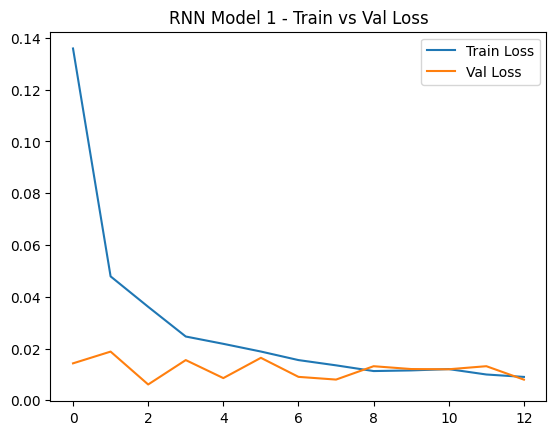

In [34]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('RNN Model 1 - Train vs Val Loss')
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [35]:
y_pred = y_scaler.inverse_transform(model_RNN_1.predict(X_test_scaled))
y_test_orig = y_scaler.inverse_transform(y_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step


In [38]:
r2= r2_score(y_test_orig, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))
mape = mean_absolute_percentage_error(y_test_orig, y_pred)
print(f"R^2 is {r2} \n RMSE is {rmse} \n MAPE is {mape}")

R^2 is -0.2919675682977576 
 RMSE is 12.23202081917656 
 MAPE is 0.045925585167653875


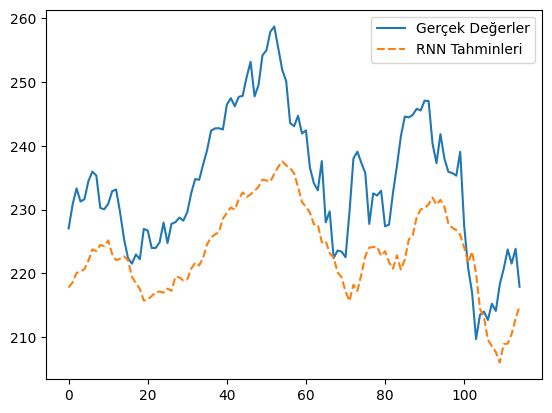

In [36]:
plt.plot(y_test_orig, label='Gerçek Değerler')
plt.plot(y_pred, label='RNN Tahminleri', linestyle='--')
plt.legend()
plt.show()

In [39]:
from tensorflow.keras.layers import BatchNormalization

model_RNN_2 = Sequential([
    SimpleRNN(units=128, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.3),
    BatchNormalization(),

    SimpleRNN(units=64, return_sequences=True),
    Dropout(0.3),
    BatchNormalization(),

    SimpleRNN(units=32),
    Dropout(0.3),

    Dense(16, activation='relu'),
    Dense(1)
])

model_RNN_2.compile(optimizer='adam', loss='mse', metrics=['mse'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
history = model_RNN_2.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=0
)

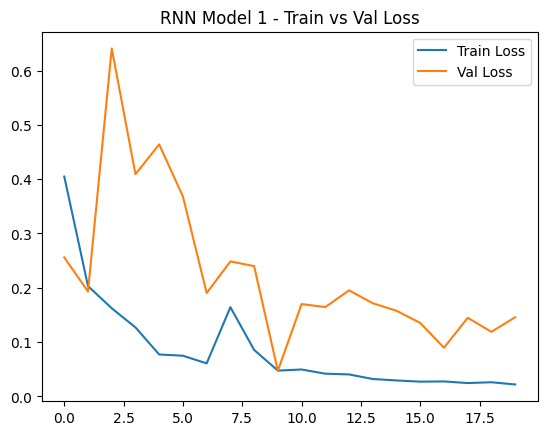

In [41]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('RNN Model 1 - Train vs Val Loss')
plt.legend()
plt.show()

In [42]:
y_pred = y_scaler.inverse_transform(model_RNN_1.predict(X_test_scaled))
y_test_orig = y_scaler.inverse_transform(y_test_scaled)
r2= r2_score(y_test_orig, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))
mape = mean_absolute_percentage_error(y_test_orig, y_pred)
print(f"R^2 is {r2} \n RMSE is {rmse} \n MAPE is {mape}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R^2 is -0.2919675682977576 
 RMSE is 12.23202081917656 
 MAPE is 0.045925585167653875


# RNN, All Features

In [44]:
X_train, y_train, X_val, y_val, X_test, y_test = prepare_rnn_data(
    apple_df,
    target_col='Close',
    use_all_features=True,
    seq_length=60
)

In [45]:
x_scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = x_scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val_scaled = x_scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
X_test_scaled = x_scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [46]:
y_scaler = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_val_scaled = y_scaler.transform(y_val.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))

In [48]:
model_RNN_1 = Sequential(
    [
        SimpleRNN(units=64, return_sequences=True,input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
        Dropout(0.2),
        SimpleRNN(units=32),
        Dropout(0.2),
        Dense(1)
    ]
)

model_RNN_1.compile(optimizer='adam',loss='mse',metrics=['mse'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
history = model_RNN_1.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=0
)

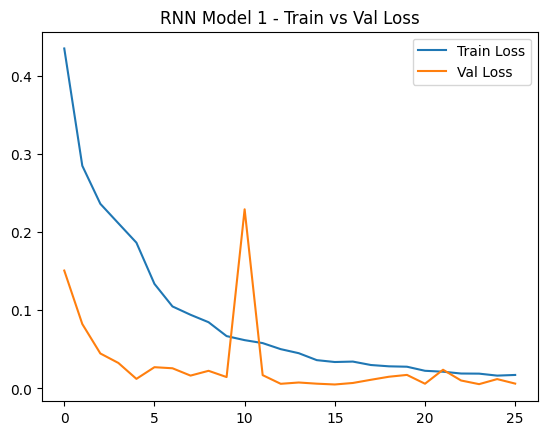

In [50]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('RNN Model 1 - Train vs Val Loss')
plt.legend()
plt.show()

In [51]:
y_pred = y_scaler.inverse_transform(model_RNN_1.predict(X_test_scaled))
y_test_orig = y_scaler.inverse_transform(y_test_scaled)
r2= r2_score(y_test_orig, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))
mape = mean_absolute_percentage_error(y_test_orig, y_pred)
print(f"R^2 is {r2} \n RMSE is {rmse} \n MAPE is {mape}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step
R^2 is -0.2322622549837161 
 RMSE is 11.946040385526448 
 MAPE is 0.04141801252445485
